## Task 2:
* Compute and plot the ACF (with lag.max = 48) of the data. What do you observe on the
ACF plot? Can you suggest why the correlation decays so slowly?
* Plot the histogram of the data. What do you observe on the histogram plot?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import seaborn as sns
from scipy import stats

In [15]:
df = pd.read_csv('/Users/lihong/Desktop/ats_proj_submit_code/co2.csv')

In [28]:
###remove rows with missing or invalid data 
## convert decimal year to date 

def decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    year_start = pd.Timestamp(year=year, month=1, day=1)
    year_end = pd.Timestamp(year=year+1, month=1, day=1)
    return year_start + (year_end - year_start) * remainder

df['date'] = df['time(co2)'].apply(decimal_year_to_date)
df['co2'] = pd.to_numeric(df['co2'], errors='coerce')
df.set_index('date', inplace=True)

## plot ACF bar chart 
axes[1].bar(range(49), acf_values, width=0.8, color='steelblue', alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)


##plot ACF bar chart with 95% confidence interval 
axes[1].bar(range(49), acf_values, width=0.8, color='steelblue', alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

##plot 95% confidence interval 
confidence_interval = 1.96/np.sqrt(len(co2_data))
axes[1].axhline(y=confidence_interval, color='red', linestyle='--', 
                linewidth=1.5, alpha=0.7, label='95% CI')
axes[1].axhline(y=-confidence_interval, color='red', linestyle='--', 
                linewidth=1.5, alpha=0.7)
axes[1].set_title('ACF Bar Plot with 95% Confidence Interval', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Lag (months)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('ACF', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].legend(fontsize=11)

#plot vertical lines and text labels for each lag 
for i in [12, 24, 36, 48]:
    axes[1].axvline(x=i, color='green', linestyle=':', linewidth=1.5, alpha=0.5)
    axes[1].text(i, axes[1].get_ylim()[1]*0.95, f'{i}', 
                ha='center', fontsize=10, color='green', fontweight='bold')

plt.tight_layout()
plt.savefig('task2_acf_plot.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>

### 1-1 analysis of acf plot

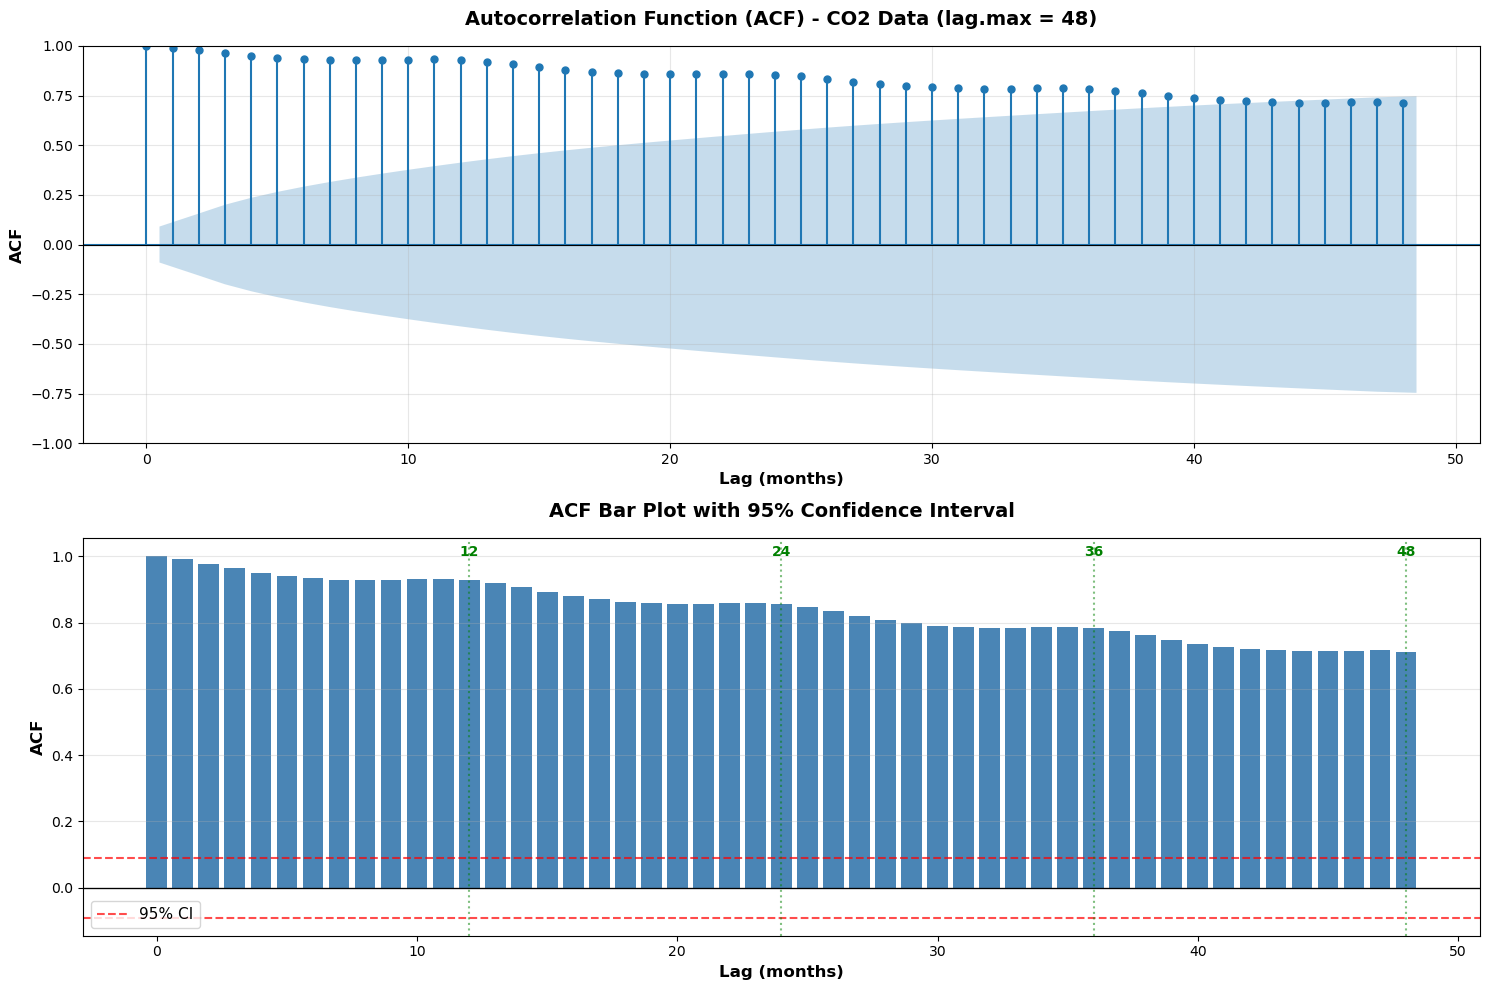

In [37]:

co2_data = df['co2'].dropna()
acf_values = acf(co2_data, nlags=48, fft=False)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# subplot1: use statsmodels's plot_acf function  
plot_acf(co2_data, lags=48, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF) - CO2 Data (lag.max = 48)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Lag (months)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('ACF', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
##subplot2 mannual plot ACF bar chart  
axes[1].bar(range(49), acf_values, width=0.8, color='steelblue', alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

## plot ACF bar chart 
axes[1].bar(range(49), acf_values, width=0.8, color='steelblue', alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)


##plot ACF bar chart with 95% confidence interval 
axes[1].bar(range(49), acf_values, width=0.8, color='steelblue', alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

##plot 95% confidence interval 
confidence_interval = 1.96/np.sqrt(len(co2_data))
axes[1].axhline(y=confidence_interval, color='red', linestyle='--', 
                linewidth=1.5, alpha=0.7, label='95% CI')
axes[1].axhline(y=-confidence_interval, color='red', linestyle='--', 
                linewidth=1.5, alpha=0.7)
axes[1].set_title('ACF Bar Plot with 95% Confidence Interval', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Lag (months)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('ACF', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].legend(fontsize=11)

#plot vertical lines and text labels for each lag 
for i in [12, 24, 36, 48]:
    axes[1].axvline(x=i, color='green', linestyle=':', linewidth=1.5, alpha=0.5)
    axes[1].text(i, axes[1].get_ylim()[1]*0.95, f'{i}', 
                ha='center', fontsize=10, color='green', fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task2_acf_plot.png',dpi=300,bbox_inches='tight')
plt.show()

### 1-2 histogram analysis

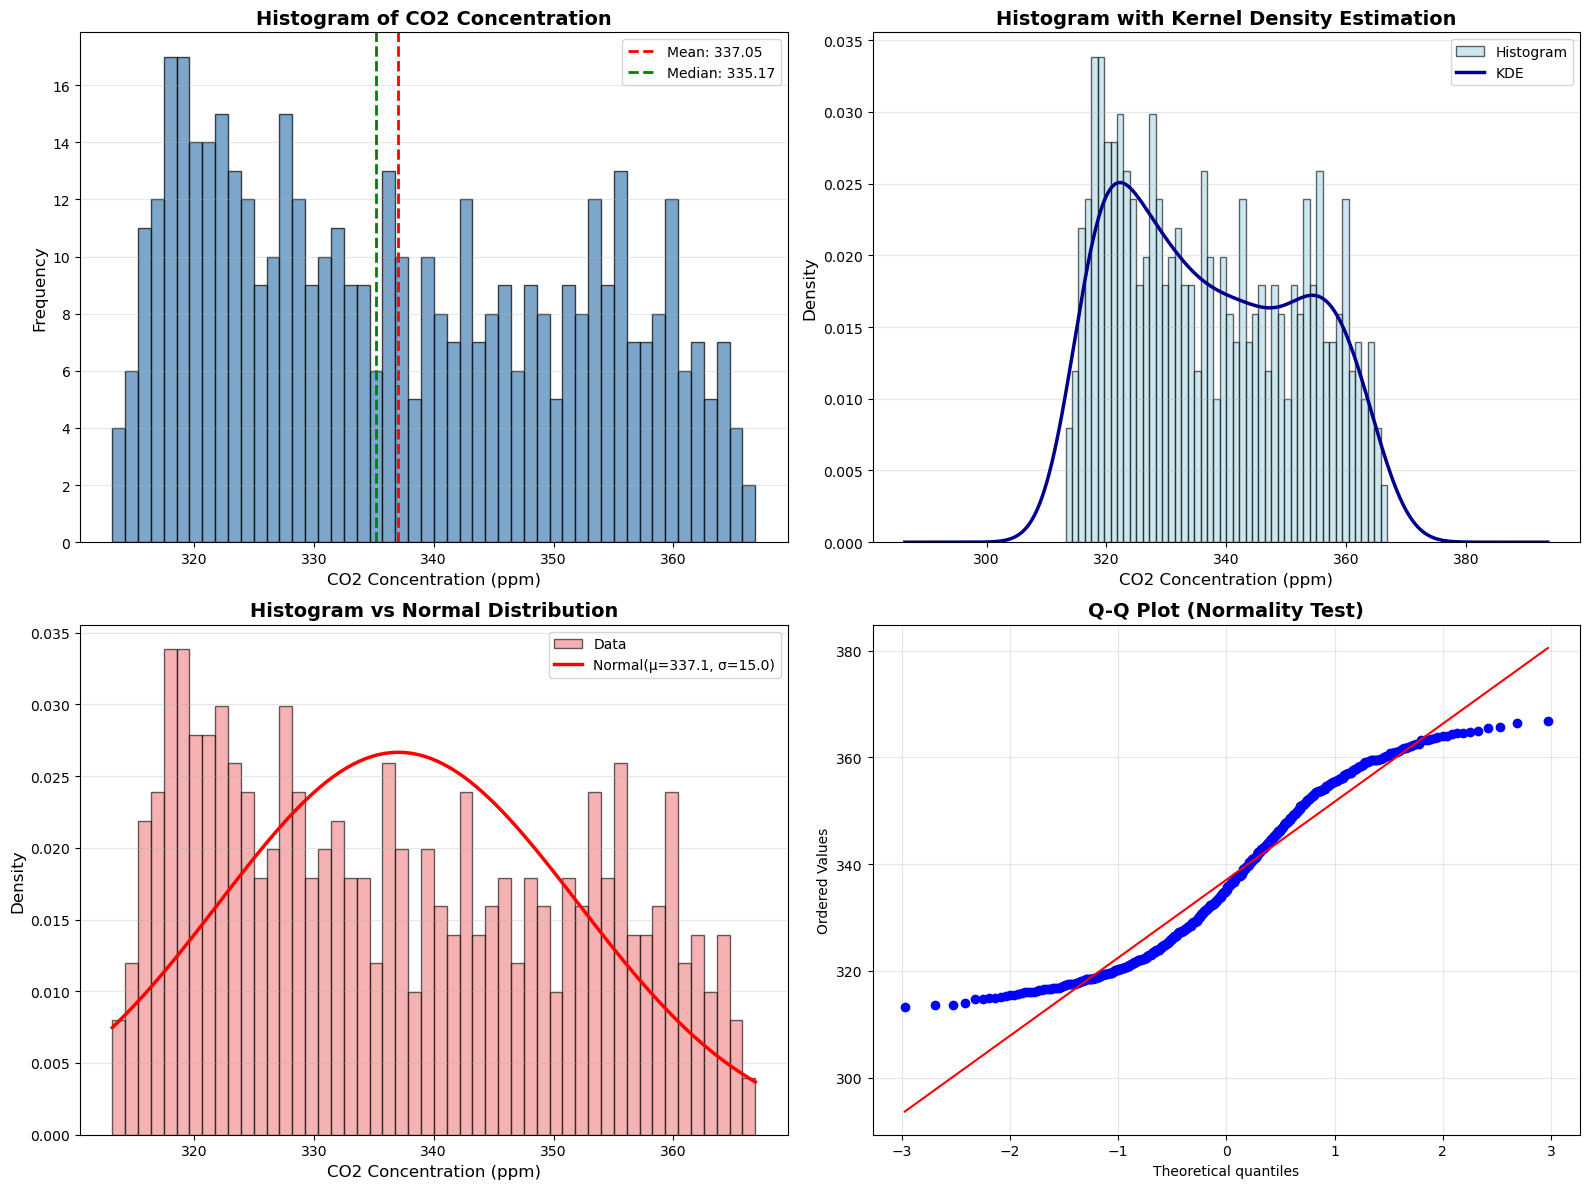

In [38]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# subplot1: histogram of co2 concentration to check the distribution 
axes[0, 0].hist(co2_data, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(co2_data.mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {co2_data.mean():.2f}')
axes[0, 0].axvline(co2_data.median(), color='green', linestyle='--', 
                   linewidth=2, label=f'Median: {co2_data.median():.2f}')
axes[0, 0].set_title('Histogram of CO2 Concentration', 
                     fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('CO2 Concentration (ppm)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3, axis='y')

### subplot2: histogram with kernel density estimation 
axes[0, 1].hist(co2_data, bins=50, density=True, color='lightblue', 
                alpha=0.6, edgecolor='black', label='Histogram')
co2_data.plot(kind='kde', ax=axes[0, 1], color='darkblue', 
              linewidth=2.5, label='KDE')
axes[0, 1].set_title('Histogram with Kernel Density Estimation', 
                     fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('CO2 Concentration (ppm)', fontsize=12)
axes[0, 1].set_ylabel('Density', fontsize=12)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# subplot3: histogram with normal distribution for comparison 

axes[1, 0].hist(co2_data, bins=50, density=True, color='lightcoral', 
                alpha=0.6, edgecolor='black', label='Data')
# fit normal distribution 
mu, sigma = co2_data.mean(), co2_data.std()
x = np.linspace(co2_data.min(), co2_data.max(), 100)
axes[1, 0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', 
                linewidth=2.5, label=f'Normal(μ={mu:.1f}, σ={sigma:.1f})')
axes[1, 0].set_title('Histogram vs Normal Distribution', 
                     fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('CO2 Concentration (ppm)', fontsize=12)
axes[1, 0].set_ylabel('Density', fontsize=12)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3, axis='y')

## subplot4: Q-Q plot 
stats.probplot(co2_data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Test)', 
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()

plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task2_histogram_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [39]:
# ========== 3. Detailed Statistical Analysis ==========
print("="*70)
print("Histogram Statistical Analysis")
print("="*70)

# Basic statistics
print("\n【Basic Statistics】")
print(f"  Mean:               {co2_data.mean():.2f} ppm")
print(f"  Median:             {co2_data.median():.2f} ppm")
print(f"  Mode:               {co2_data.mode().values[0]:.2f} ppm")
print(f"  Standard Deviation: {co2_data.std():.2f} ppm")
print(f"  Variance:           {co2_data.var():.2f}")
print(f"  Minimum:            {co2_data.min():.2f} ppm")
print(f"  Maximum:            {co2_data.max():.2f} ppm")
print(f"  Range:              {co2_data.max() - co2_data.min():.2f} ppm")

# Quantiles
print("\n【Quantiles】")
print(f"  25th percentile:    {co2_data.quantile(0.25):.2f} ppm")
print(f"  50th percentile:    {co2_data.quantile(0.50):.2f} ppm")
print(f"  75th percentile:    {co2_data.quantile(0.75):.2f} ppm")
print(f"  IQR:                {co2_data.quantile(0.75) - co2_data.quantile(0.25):.2f} ppm")

# Distribution shape
print("\n【Distribution Shape】")
skewness = co2_data.skew()
kurtosis = co2_data.kurtosis()
print(f"  Skewness:           {skewness:.4f}")
if abs(skewness) < 0.5:
    skew_interpretation = "Approximately symmetric"
elif skewness > 0:
    skew_interpretation = "Right-skewed (positive skew)"
else:
    skew_interpretation = "Left-skewed (negative skew)"
print(f"    Interpretation: {skew_interpretation}")

print(f"\n  Kurtosis:           {kurtosis:.4f}")
if abs(kurtosis) < 0.5:
    kurt_interpretation = "Approximately normal kurtosis"
elif kurtosis > 0:
    kurt_interpretation = "Leptokurtic (peaked distribution)"
else:
    kurt_interpretation = "Platykurtic (flat distribution)"
print(f"    Interpretation: {kurt_interpretation}")

# Normality tests
print("\n【Normality Tests】")

# Shapiro-Wilk test (for smaller samples)
if len(co2_data) <= 5000:
    shapiro_stat, shapiro_p = stats.shapiro(co2_data)
    print(f"  Shapiro-Wilk Test:")
    print(f"    Statistic: {shapiro_stat:.6f}")
    print(f"    p-value:   {shapiro_p:.6f}")
    if shapiro_p < 0.05:
        print(f"    Conclusion: Reject normality assumption (p < 0.05)")
    else:
        print(f"    Conclusion: Fail to reject normality assumption (p >= 0.05)")

# Kolmogorov-Smirnov test
ks_stat, ks_p = stats.kstest(co2_data, 'norm', args=(mu, sigma))
print(f"\n  Kolmogorov-Smirnov Test:")
print(f"    Statistic: {ks_stat:.6f}")
print(f"    p-value:   {ks_p:.6f}")
if ks_p < 0.05:
    print(f"    Conclusion: Reject normality assumption (p < 0.05)")
else:
    print(f"    Conclusion: Fail to reject normality assumption (p >= 0.05)")


Histogram Statistical Analysis

【Basic Statistics】
  Mean:               337.05 ppm
  Median:             335.17 ppm
  Mode:               313.68 ppm
  Standard Deviation: 14.97 ppm
  Variance:           223.99
  Minimum:            313.18 ppm
  Maximum:            366.84 ppm
  Range:              53.66 ppm

【Quantiles】
  25th percentile:    323.53 ppm
  50th percentile:    335.17 ppm
  75th percentile:    350.25 ppm
  IQR:                26.72 ppm

【Distribution Shape】
  Skewness:           0.2435
    Interpretation: Approximately symmetric

  Kurtosis:           -1.2155
    Interpretation: Platykurtic (flat distribution)

【Normality Tests】
  Shapiro-Wilk Test:
    Statistic: 0.942027
    p-value:   0.000000
    Conclusion: Reject normality assumption (p < 0.05)

  Kolmogorov-Smirnov Test:
    Statistic: 0.088425
    p-value:   0.001239
    Conclusion: Reject normality assumption (p < 0.05)


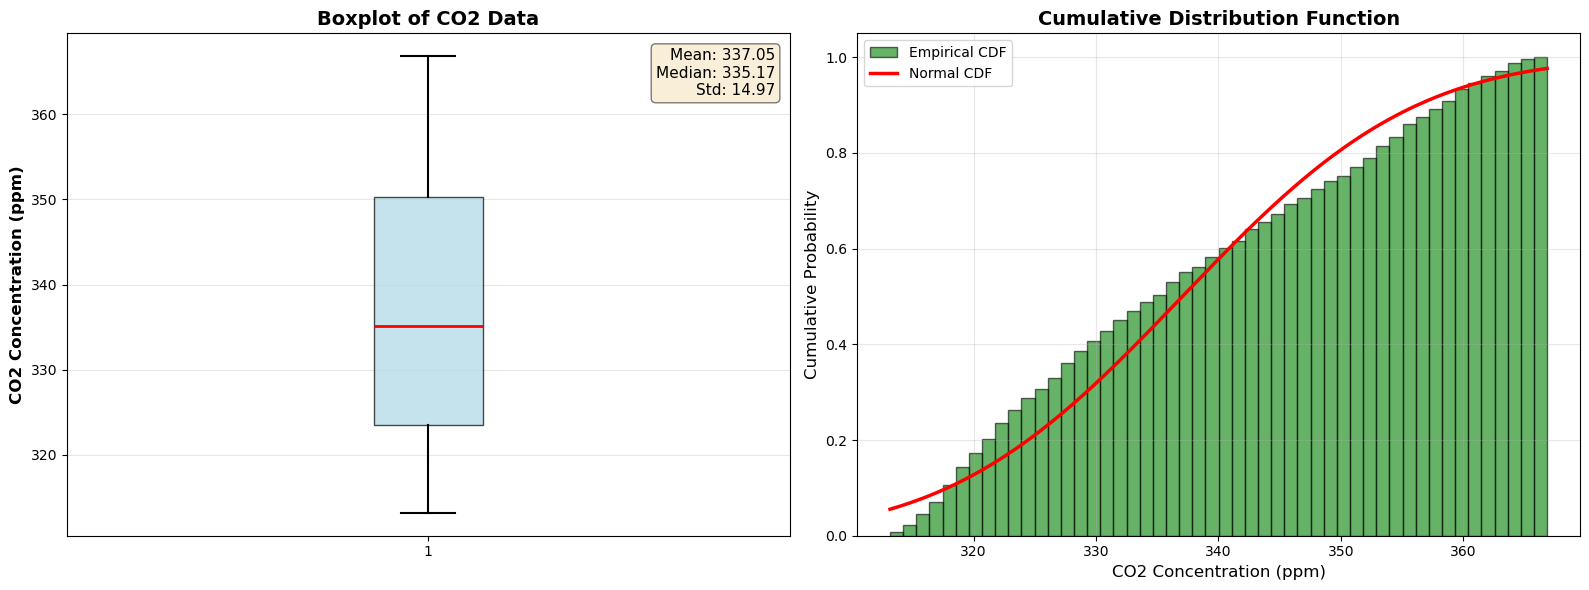

In [40]:
# ========== 4. Plot Supplementary Analysis Figures ==========
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Boxplot
axes[0].boxplot(co2_data, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))
axes[0].set_ylabel('CO2 Concentration (ppm)', fontsize=12, fontweight='bold')
axes[0].set_title('Boxplot of CO2 Data', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Add summary stats text
textstr = f'Mean: {co2_data.mean():.2f}\nMedian: {co2_data.median():.2f}\nStd: {co2_data.std():.2f}'
axes[0].text(0.98, 0.97, textstr, transform=axes[0].transAxes,
             fontsize=11, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Subplot 2: Cumulative Distribution Function
axes[1].hist(co2_data, bins=50, density=True, cumulative=True,
             color='green', alpha=0.6, edgecolor='black', label='Empirical CDF')

## Add theoretical normal CDF
x_sorted = np.sort(co2_data)
axes[1].plot(x_sorted, stats.norm.cdf(x_sorted, mu, sigma),
             'r-', linewidth=2.5, label='Normal CDF')
axes[1].set_title('Cumulative Distribution Function',
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('CO2 Concentration (ppm)', fontsize=12)
axes[1].set_ylabel('Cumulative Probability', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task2_supplementary_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

